In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
cincinnati_df = pd.read_csv('../Data/Clean/cincinnati.csv')

In [3]:
cincinnati_df.head()


,DATE,MarketTempIdx,DaysToClose,DaysOnZillow,ListingPriceCutAmt,ListingPriceCutPct,NewConstructMeanSalePrice,NewConstructSalesCount,SalesCount,SalePrice,MORTGAGE15US,MORTGAGE30US,RATE_DIFFERENCE
0,2018-01,42.0,39.0,49.0,8892.789676,0.188391,277393.789308,321.0,1979.0,173346.496800,3.482,4.033,0.550
1,2018-02,43.0,37.0,44.0,9781.125106,0.170206,269154.079051,254.0,1948.0,174075.384919,3.785,4.330,0.545
2,2018-03,46.0,35.0,35.0,9846.737418,0.178320,315383.311005,210.0,2960.0,175200.375854,3.910,4.444,0.534
3,2018-04,50.0,37.0,32.0,11134.855937,0.201177,269780.945055,182.0,3173.0,176430.244009,3.925,4.468,0.543
4,2018-05,51.0,38.0,27.0,11504.665660,0.217566,291332.251613,155.0,3506.0,177773.394767,4.066,4.586,0.520


In [4]:
# Check for missing values 
print(cincinnati_df.isnull().sum())

DATE                         0
MarketTempIdx                0
DaysToClose                  0
DaysOnZillow                 0
ListingPriceCutAmt           0
ListingPriceCutPct           0
NewConstructMeanSalePrice    0
NewConstructSalesCount       0
SalesCount                   1
SalePrice                    0
MORTGAGE15US                 0
MORTGAGE30US                 0
RATE_DIFFERENCE              0
dtype: int64


In [5]:
cincinnati_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DATE                       78 non-null     object 
 1   MarketTempIdx              78 non-null     float64
 2   DaysToClose                78 non-null     float64
 3   DaysOnZillow               78 non-null     float64
 4   ListingPriceCutAmt         78 non-null     float64
 5   ListingPriceCutPct         78 non-null     float64
 6   NewConstructMeanSalePrice  78 non-null     float64
 7   NewConstructSalesCount     78 non-null     float64
 8   SalesCount                 77 non-null     float64
 9   SalePrice                  78 non-null     float64
 10  MORTGAGE15US               78 non-null     float64
 11  MORTGAGE30US               78 non-null     float64
 12  RATE_DIFFERENCE            78 non-null     float64
dtypes: float64(12), object(1)
memory usage: 8.1+ KB


In [6]:
# Check the shape of cincinnati DataFrame (rows, columns)
print(cincinnati_df.shape)

(78, 13)


In [7]:
# Round the specified columns to 0 decimals
cincinnati_df['ListingPriceCutAmt'] = cincinnati_df['ListingPriceCutAmt'].round(0)
cincinnati_df['NewConstructMeanSalePrice'] = cincinnati_df['NewConstructMeanSalePrice'].round(0)
cincinnati_df['SalePrice'] = cincinnati_df['SalePrice'].round(0)
cincinnati_df.head()

,DATE,MarketTempIdx,DaysToClose,DaysOnZillow,ListingPriceCutAmt,ListingPriceCutPct,NewConstructMeanSalePrice,NewConstructSalesCount,SalesCount,SalePrice,MORTGAGE15US,MORTGAGE30US,RATE_DIFFERENCE
0,2018-01,42.0,39.0,49.0,8893.0,0.188391,277394.0,321.0,1979.0,173346.0,3.482,4.033,0.550
1,2018-02,43.0,37.0,44.0,9781.0,0.170206,269154.0,254.0,1948.0,174075.0,3.785,4.330,0.545
2,2018-03,46.0,35.0,35.0,9847.0,0.178320,315383.0,210.0,2960.0,175200.0,3.910,4.444,0.534
3,2018-04,50.0,37.0,32.0,11135.0,0.201177,269781.0,182.0,3173.0,176430.0,3.925,4.468,0.543
4,2018-05,51.0,38.0,27.0,11505.0,0.217566,291332.0,155.0,3506.0,177773.0,4.066,4.586,0.520


In [8]:
#Linear Regression for cincinnati
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
#Split cincinnati Data into training and test set
X = cincinnati_df[['DaysToClose', 'DaysOnZillow', 'ListingPriceCutAmt', 'ListingPriceCutPct', 'NewConstructMeanSalePrice', 'NewConstructSalesCount', 'SalesCount', 'MORTGAGE15US', 'MORTGAGE30US', 'RATE_DIFFERENCE']]
y = cincinnati_df['SalePrice']

In [10]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Initialize the Linear Regression model
model = LinearRegression()

In [12]:
# Train the model
model.fit(X_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [14]:
# Evaluate the model
y_pred = model.predict(X_test)

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [ ]:
y_pred

array([268196.30484213, 231536.22204797, 261162.42016834, 224345.97474873,
       248764.30328171, 361832.65067339, 239651.01386958, 234386.2937835 ,
       362382.07159809, 365076.81624312, 382918.00678129, 226135.47484363,
       369997.66904237, 382944.43186157, 232035.39249256, 283742.10555805])

In [ ]:
#y_pred_rounded = np.round(y_pred,0)

In [ ]:
# Calculate evaluation metrics
linear_mse = mean_squared_error(y_test, y_pred)
linear_r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {linear_mse}")
print(f"R-Squared Score: {linear_r2}")

Mean Squared Error: 235530858.80769038
R-Squared Score: 0.9441492315547689


In [ ]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor()

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
rf_y_pred = rf_model.predict(X_test)

In [ ]:
rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {rf_mse}")
print(f"R-squared Score: {rf_r2}")

Mean Squared Error: 235530858.80769038
R-squared Score: 0.9441492315547689


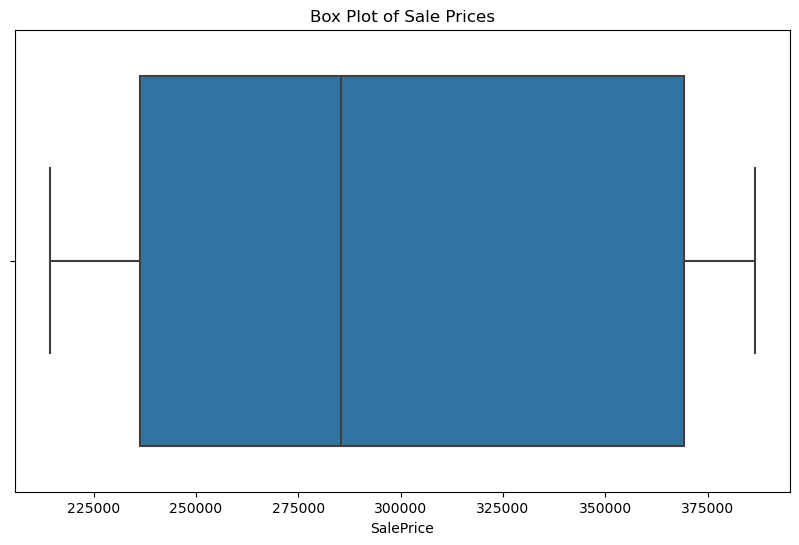

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'SalePrice' is your target variable
plt.figure(figsize=(10, 6))
sns.boxplot(x=cincinnati_df['SalePrice'])
plt.title('Box Plot of Sale Prices')
plt.show()

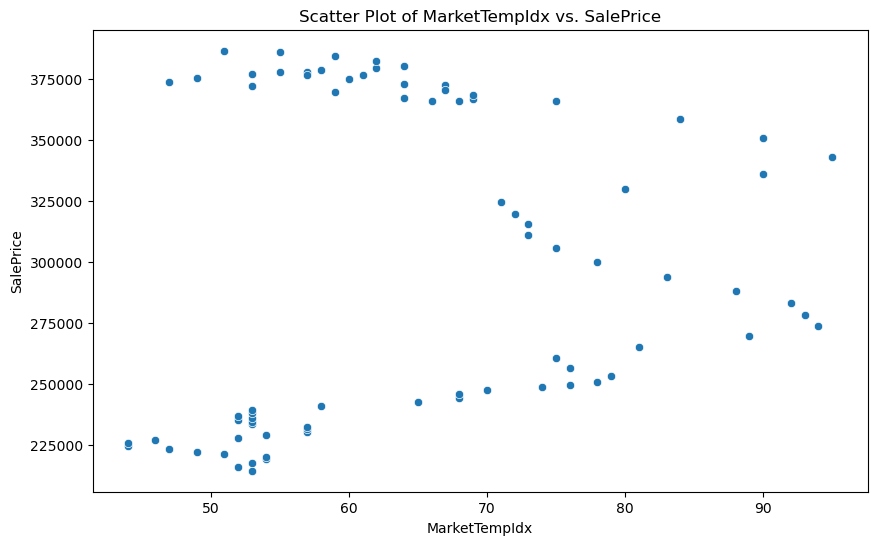

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=cincinnati_df['MarketTempIdx'], y=cincinnati_df['SalePrice'])
plt.title('Scatter Plot of MarketTempIdx vs. SalePrice')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


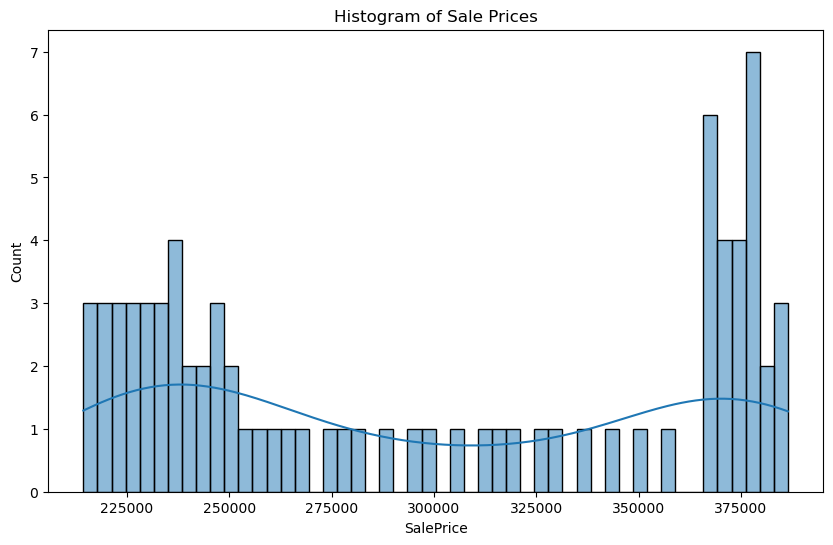

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(cincinnati_df['SalePrice'], bins=50, kde=True)
plt.title('Histogram of Sale Prices')
plt.show()